# Adjusting appearance

## labelling points

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



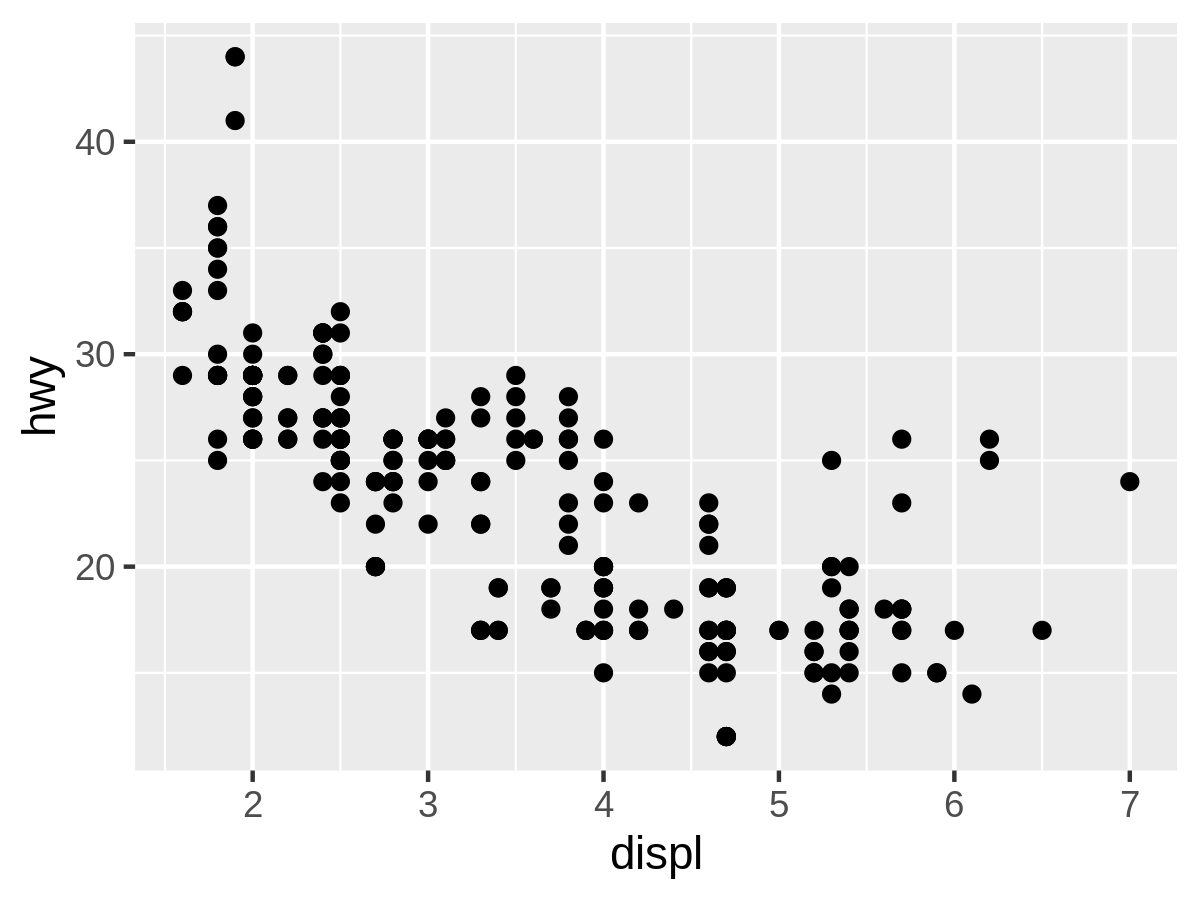

In [2]:
options(repr.plot.res = 300, repr.plot.height = 3, repr.plot.width = 4)

p = ggplot(mpg, aes(x = displ, y = hwy))

p = p + geom_point()

p

In [3]:
# ?geom_text

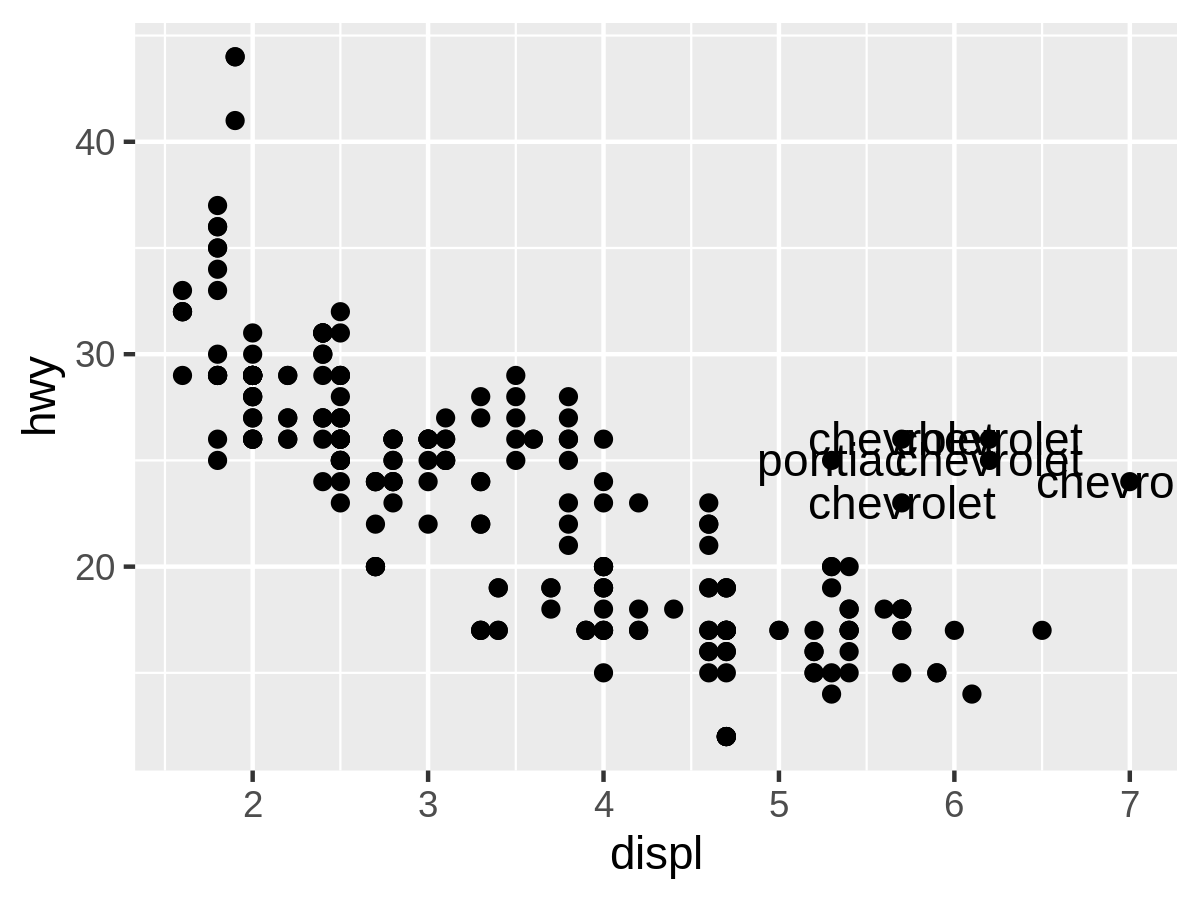

In [4]:
p + geom_text(data = mpg %>% filter(displ > 5, hwy > 21), 
              aes(label = manufacturer))

In [5]:
library('ggrepel')

[GGRepel](https://github.com/slowkow/ggrepel)

In [6]:
filtered.data = mpg %>% filter(displ > 5, hwy > 21)

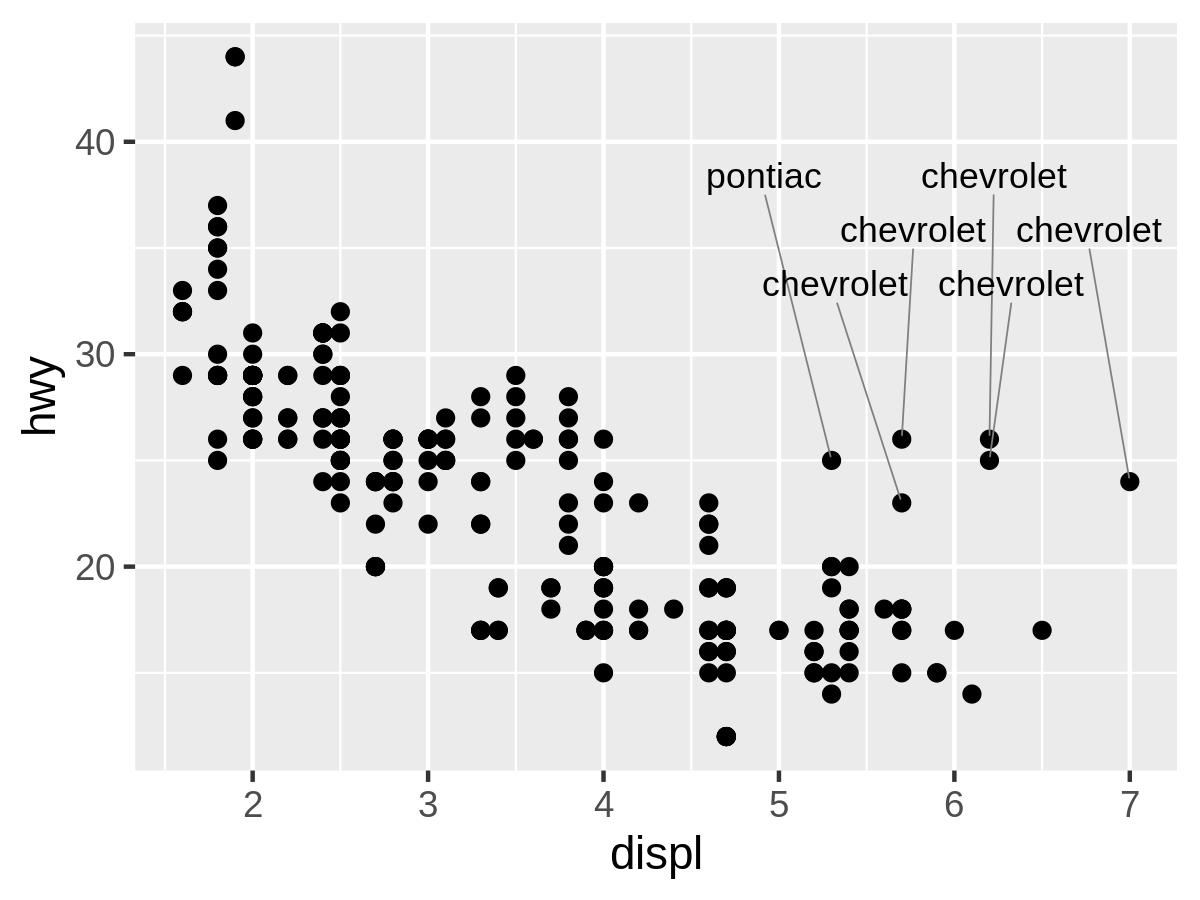

In [7]:
p + geom_text_repel(
        data = filtered.data,
        nudge_y = 36 - filtered.data$hwy,
        segment.size = 0.2,
        size = 3,
        segment.color = "grey50",
        aes(label = manufacturer)
    )

## Legends, axes, titles, themes

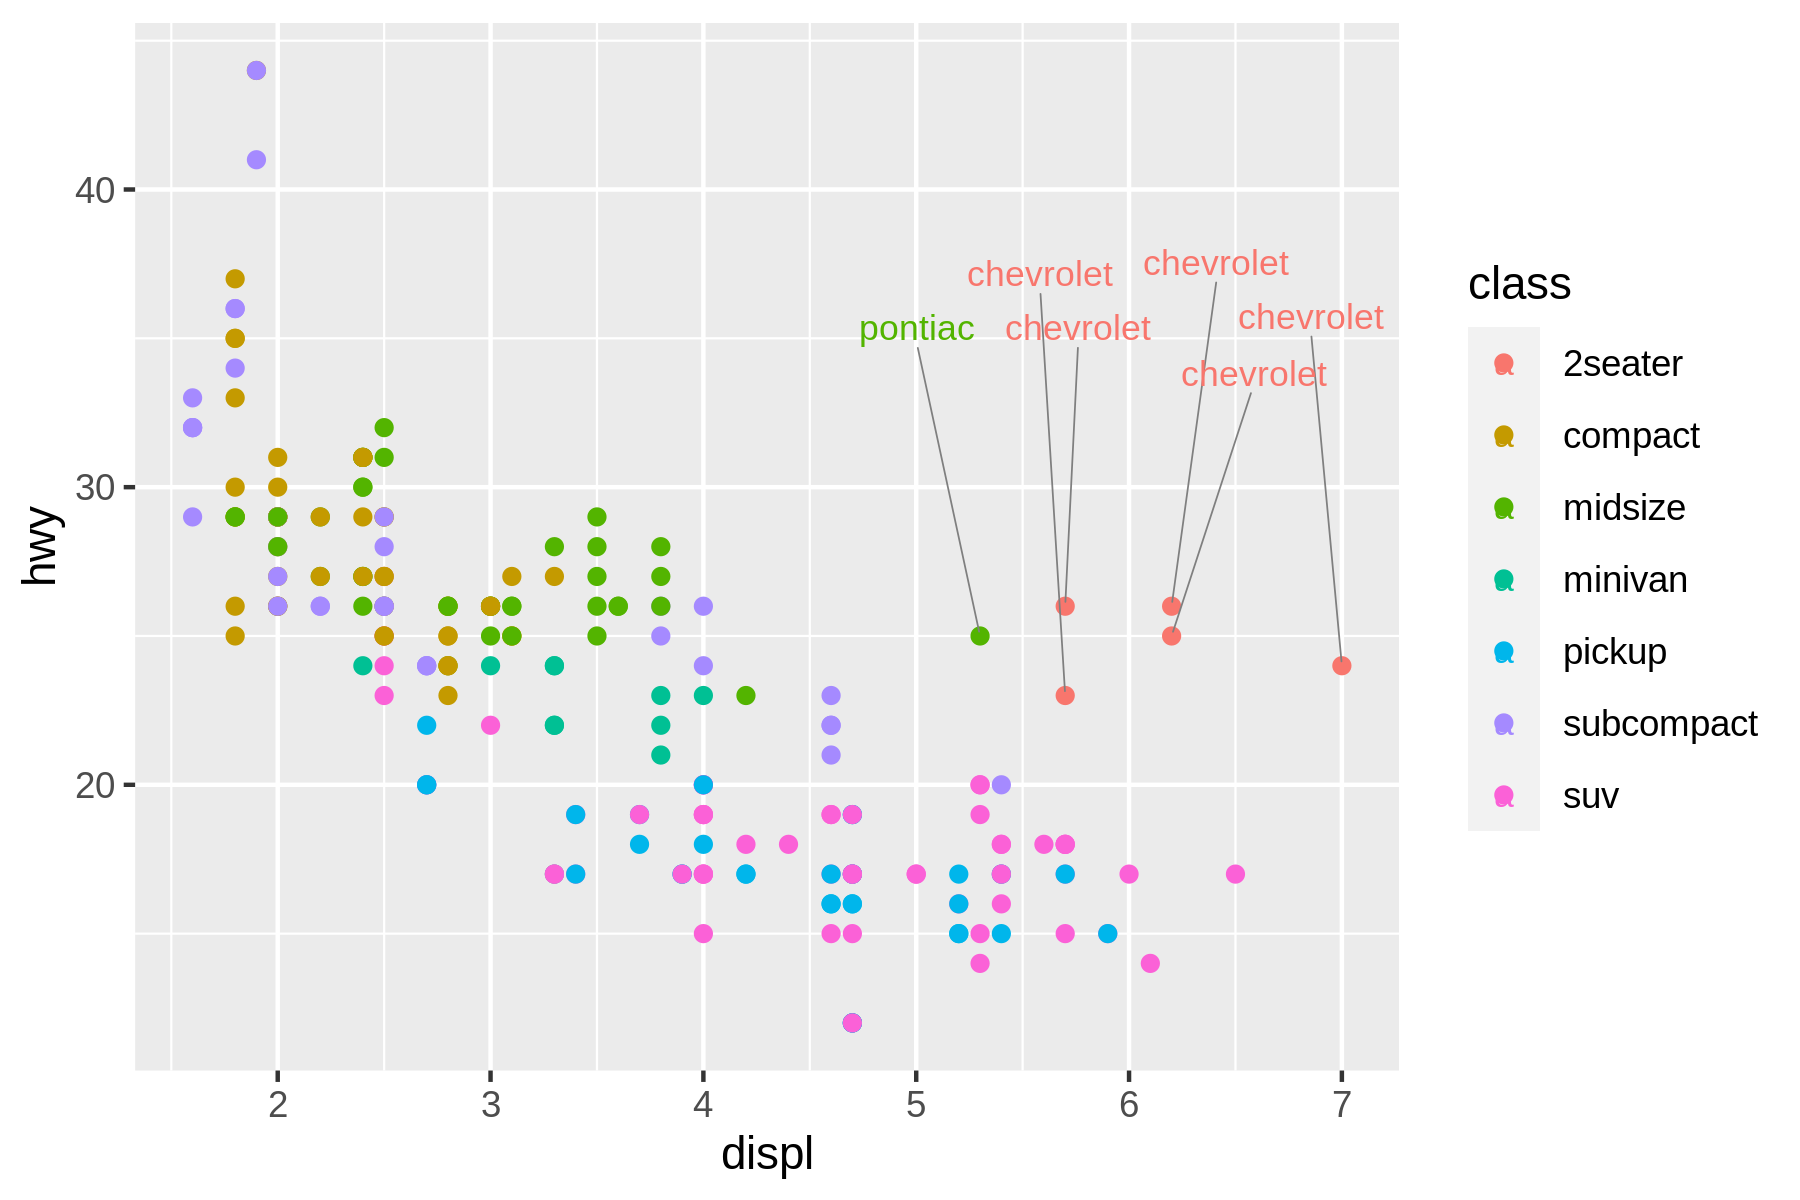

In [8]:
options(repr.plot.res = 300, repr.plot.height = 4, repr.plot.width = 6)

p = ggplot(mpg, aes(x = displ, y = hwy, color = class))

p = p + geom_point()

p = p + geom_text_repel(
            data = filtered.data,
            nudge_y = 36 - filtered.data$hwy,
            segment.size = 0.2,
            size = 3,
            segment.color = "grey50",
            aes(label = manufacturer),
        )

p

In [9]:
# p

## Theme

In [10]:
# theme_

- `theme_bw()` (e.g.)
- `theme()`

[https://ggplot2.tidyverse.org/reference/theme.html](https://ggplot2.tidyverse.org/reference/theme.html)

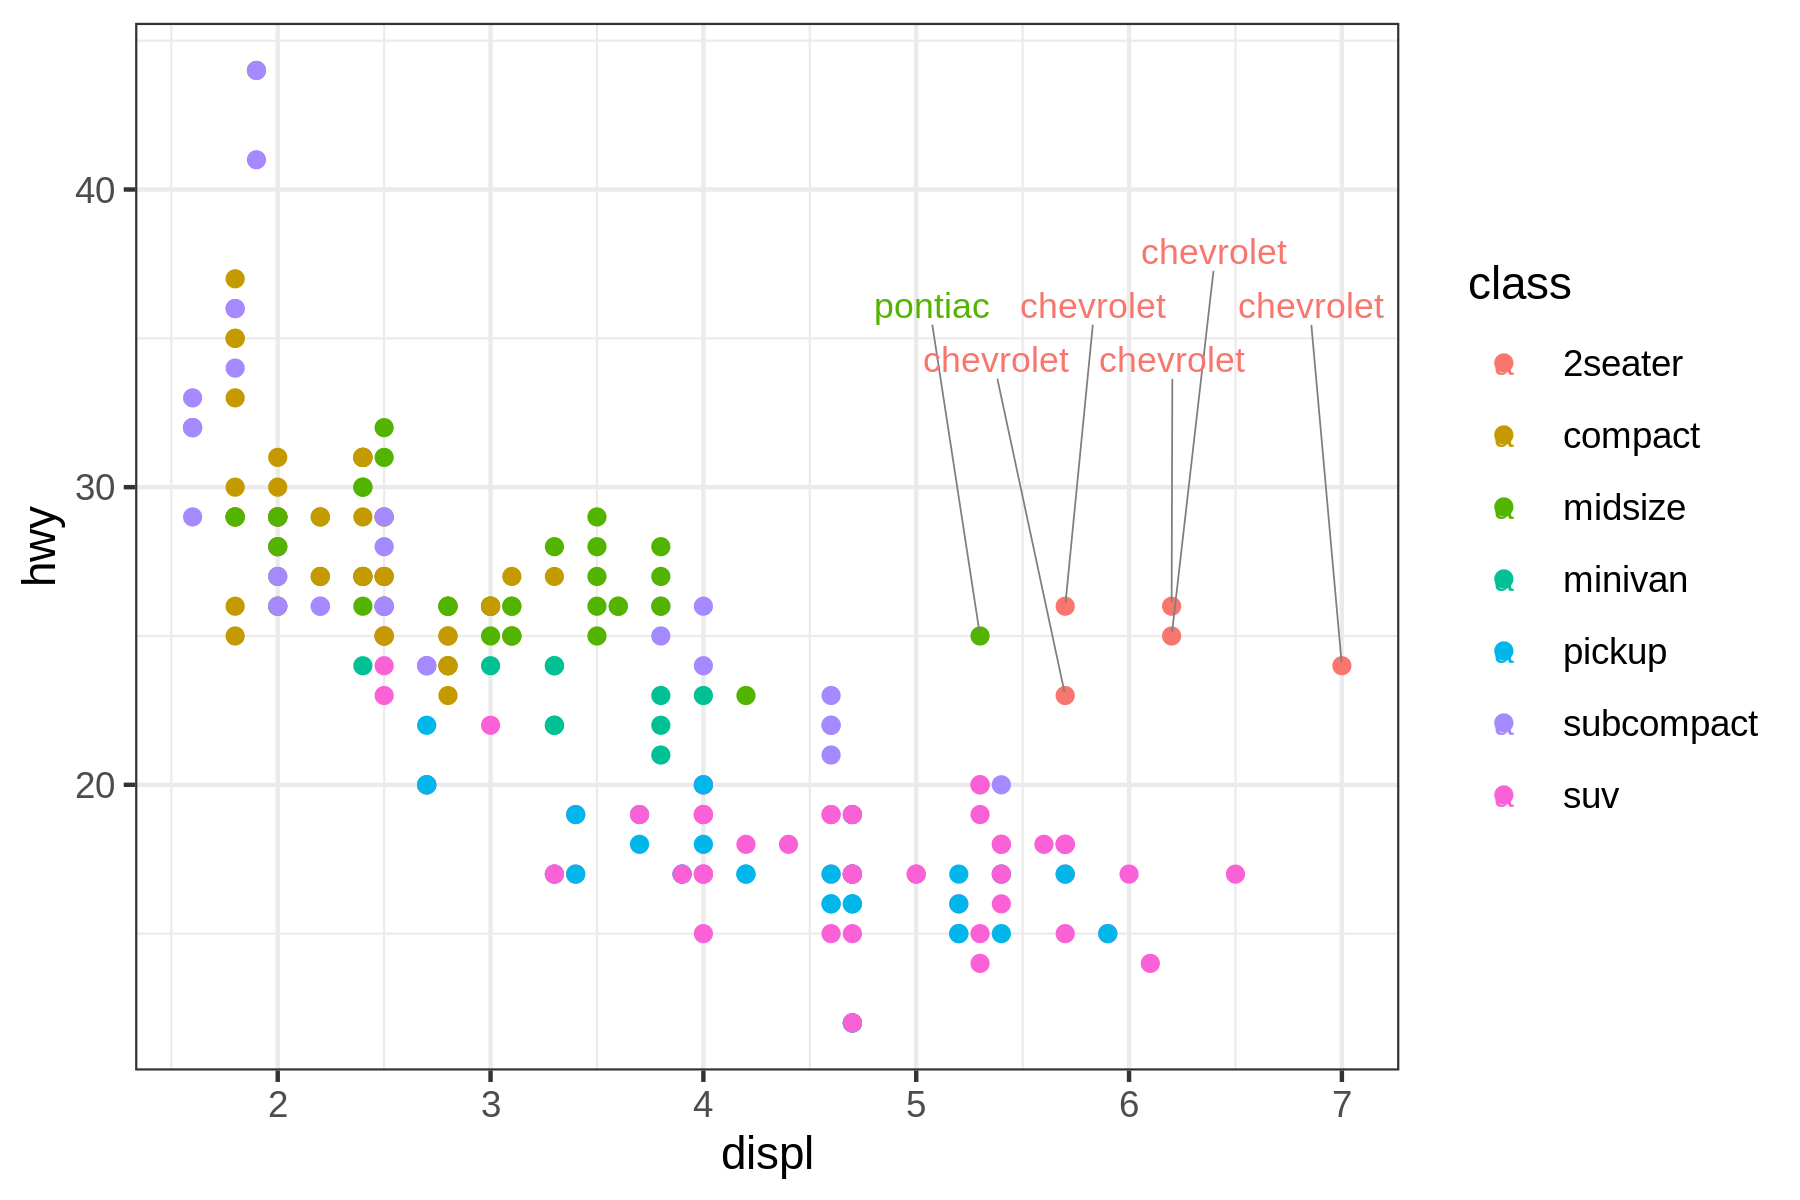

In [11]:
p = p + theme_bw()

p

### Legend position

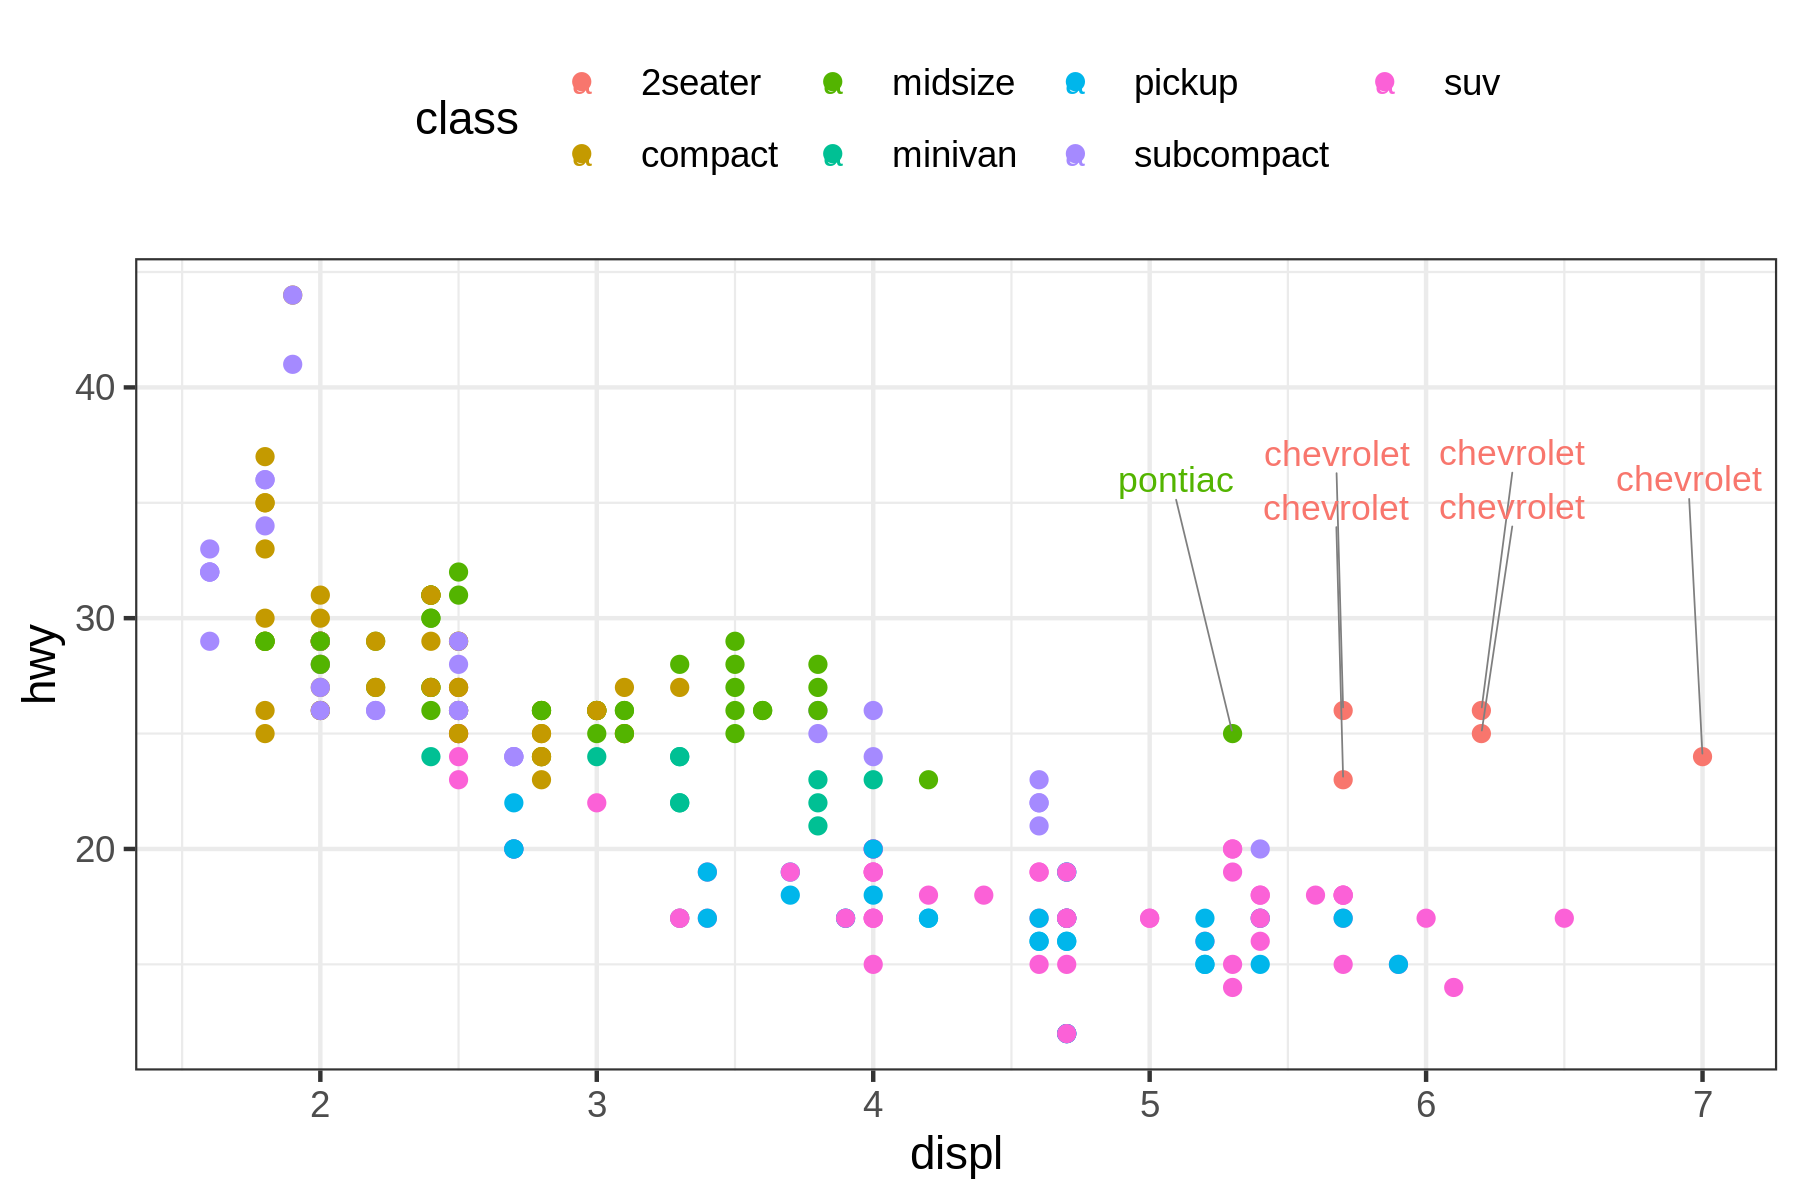

In [12]:
p = p + theme(legend.position = 'top')

p

### Axis text font/orientation

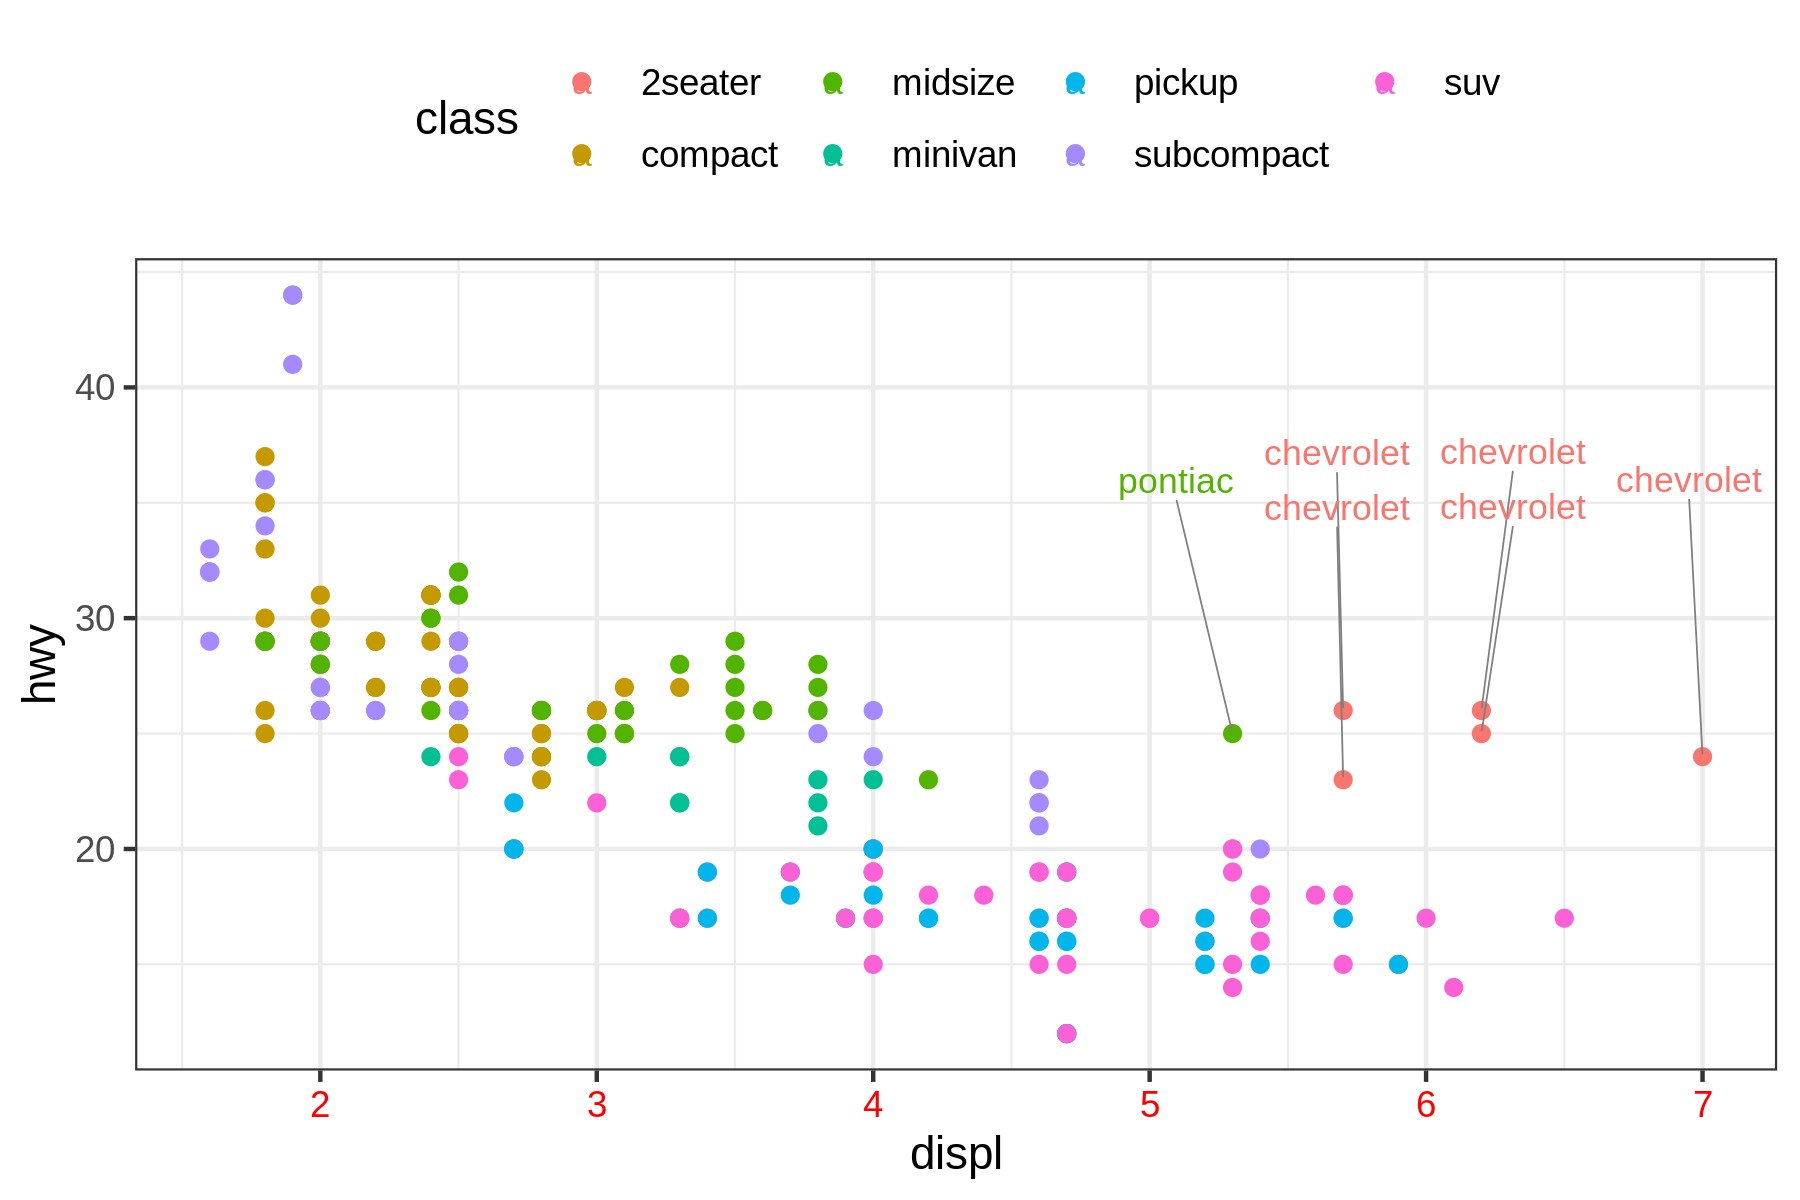

In [13]:
p + theme(axis.text.x = element_text(colour = 'red'))

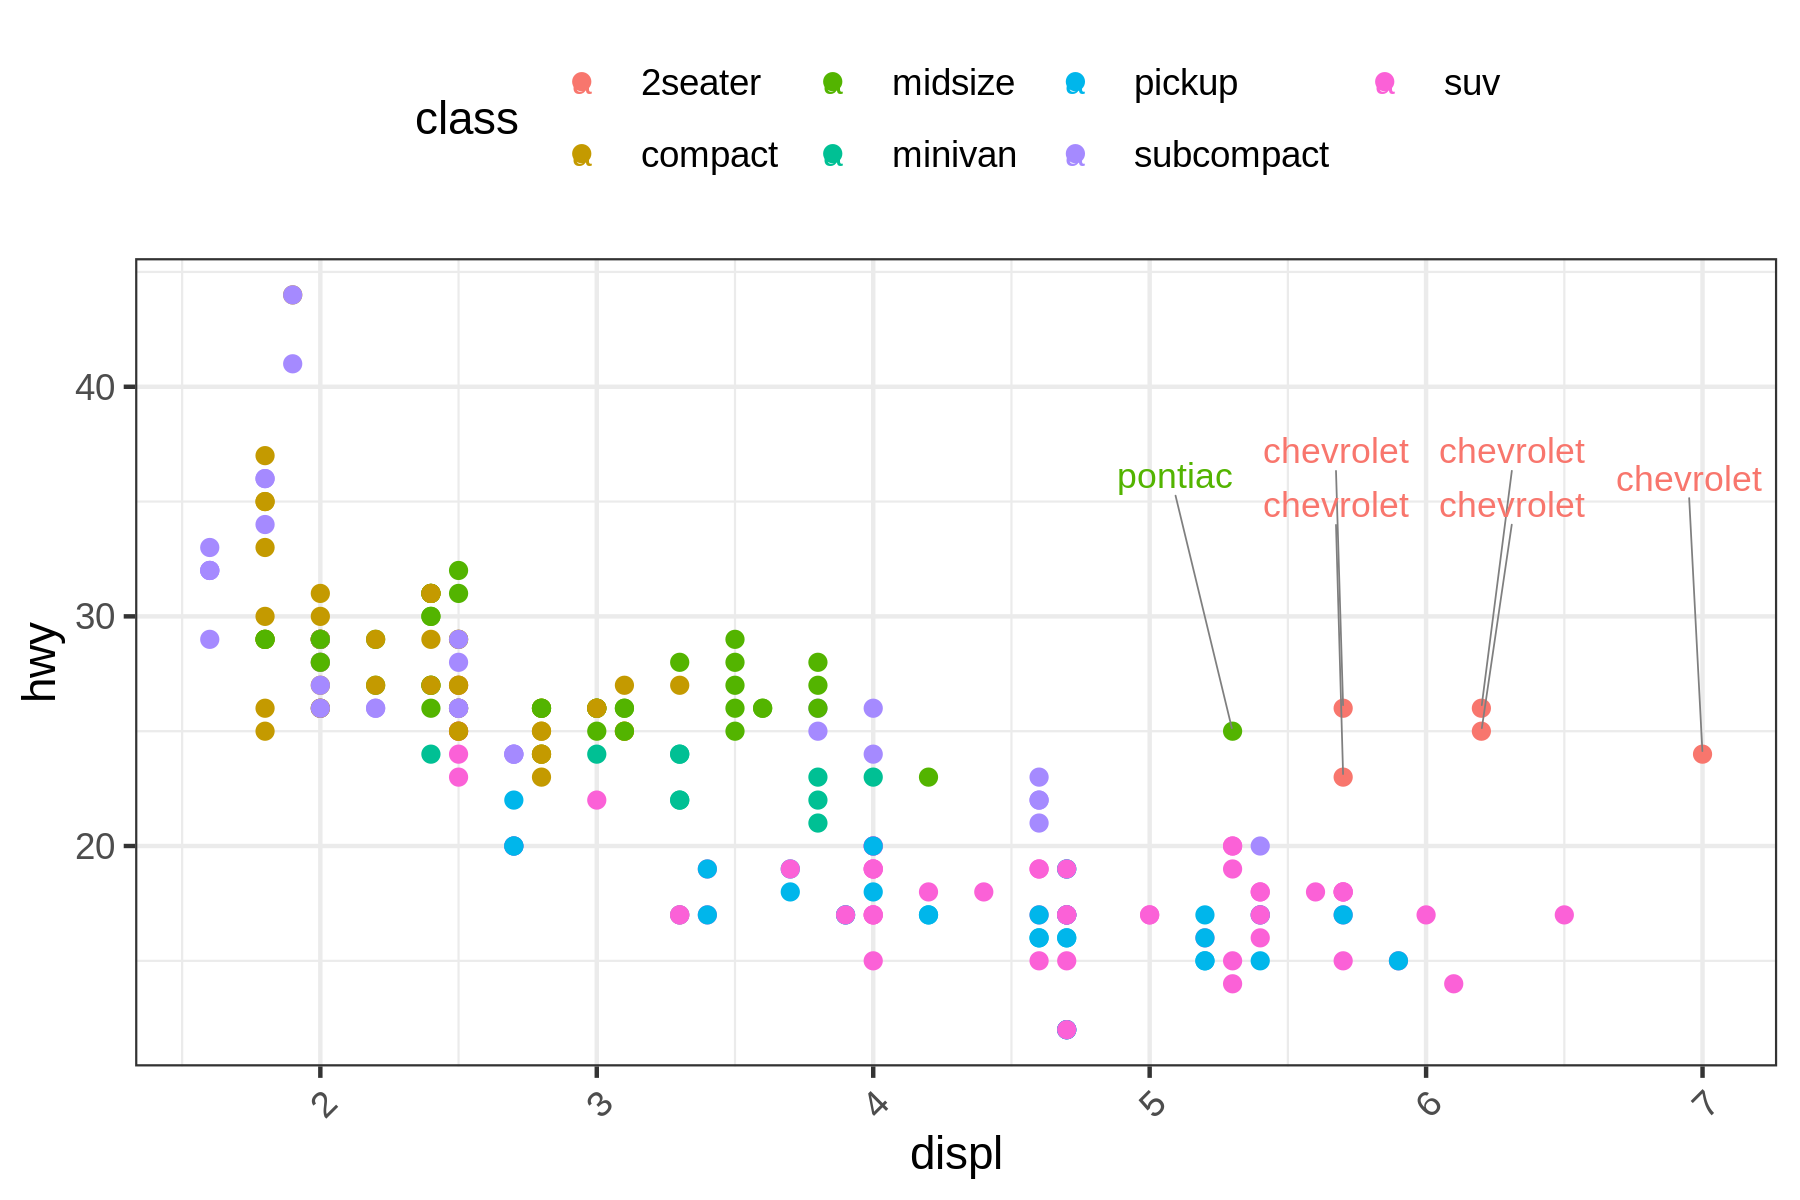

In [14]:
p + theme(axis.text.x = element_text(angle = 45, hjust = 1)) # what about the y-axis? All axis text?

## Labs

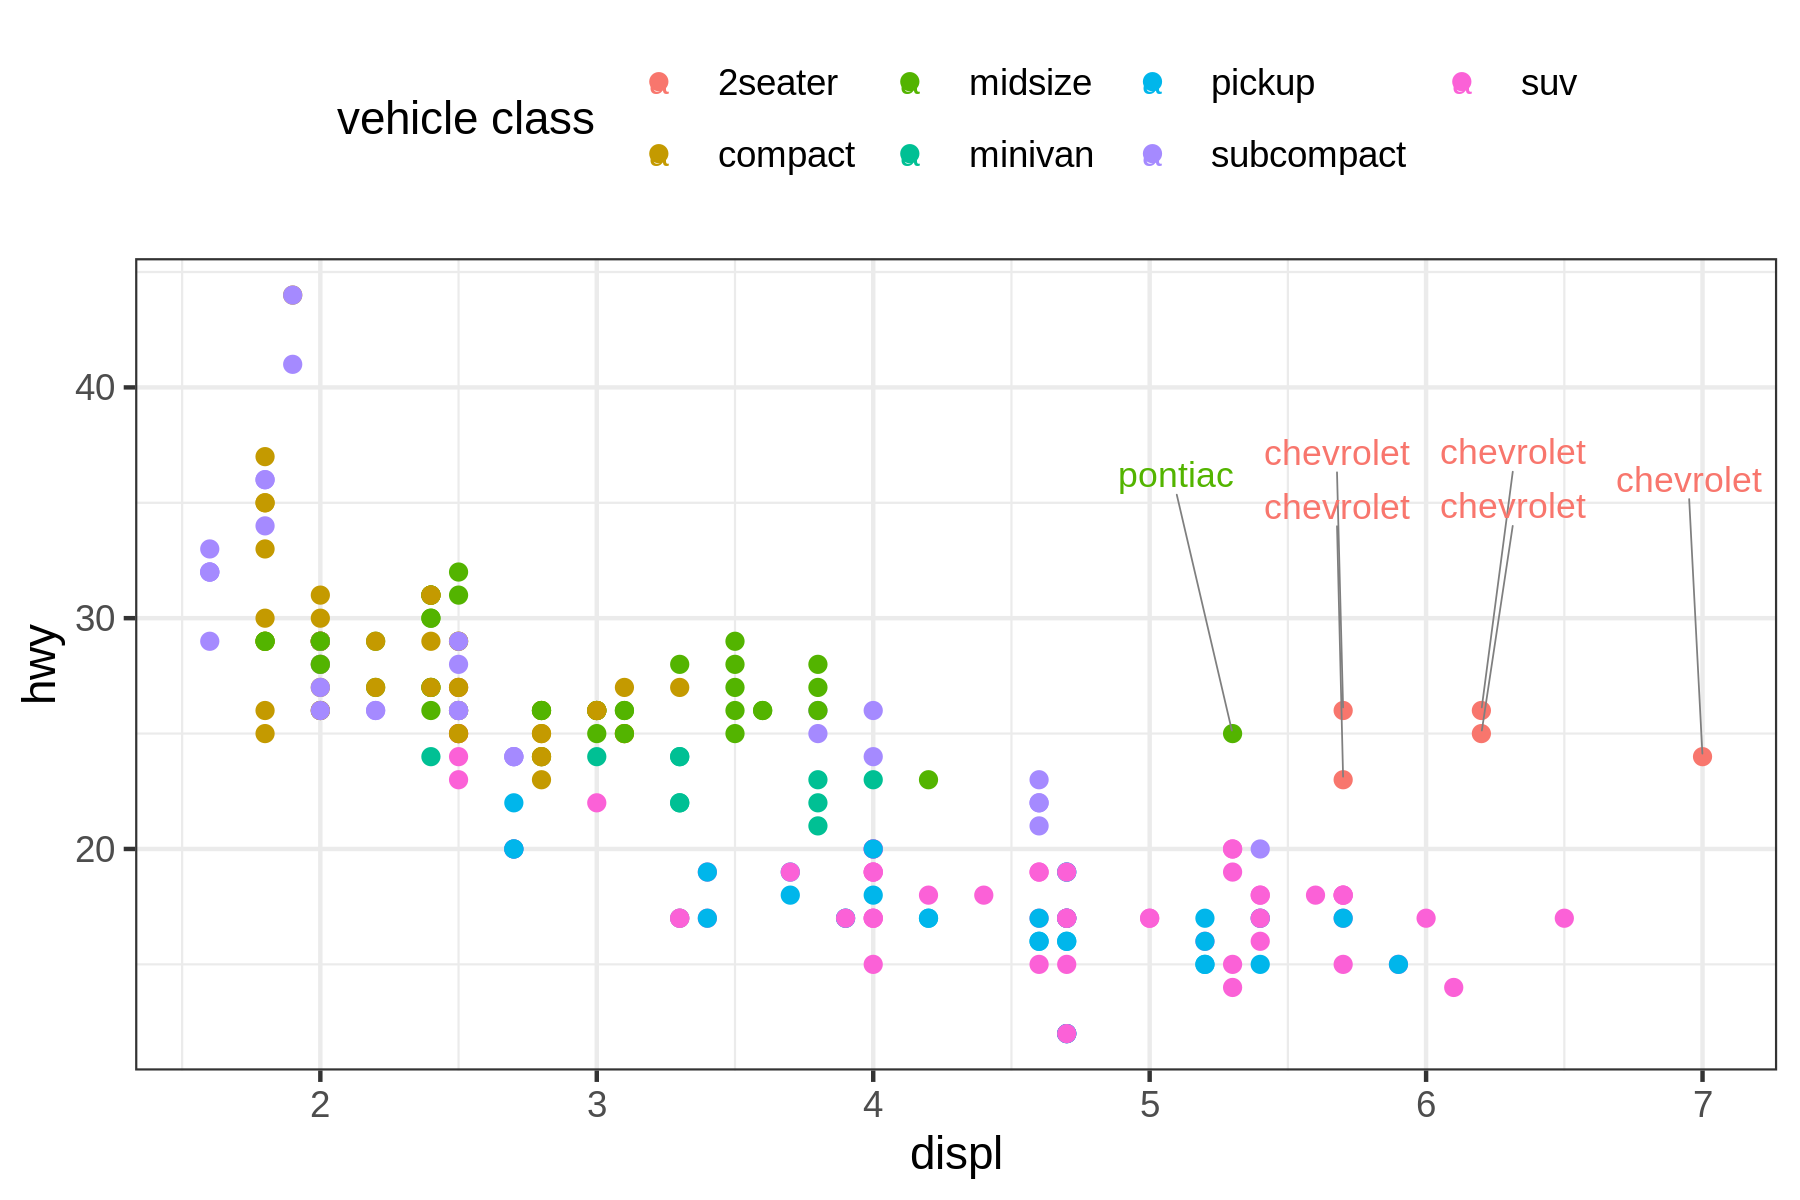

In [15]:
p = p + labs(color = 'vehicle class')

p

How would you change the x-axis label?

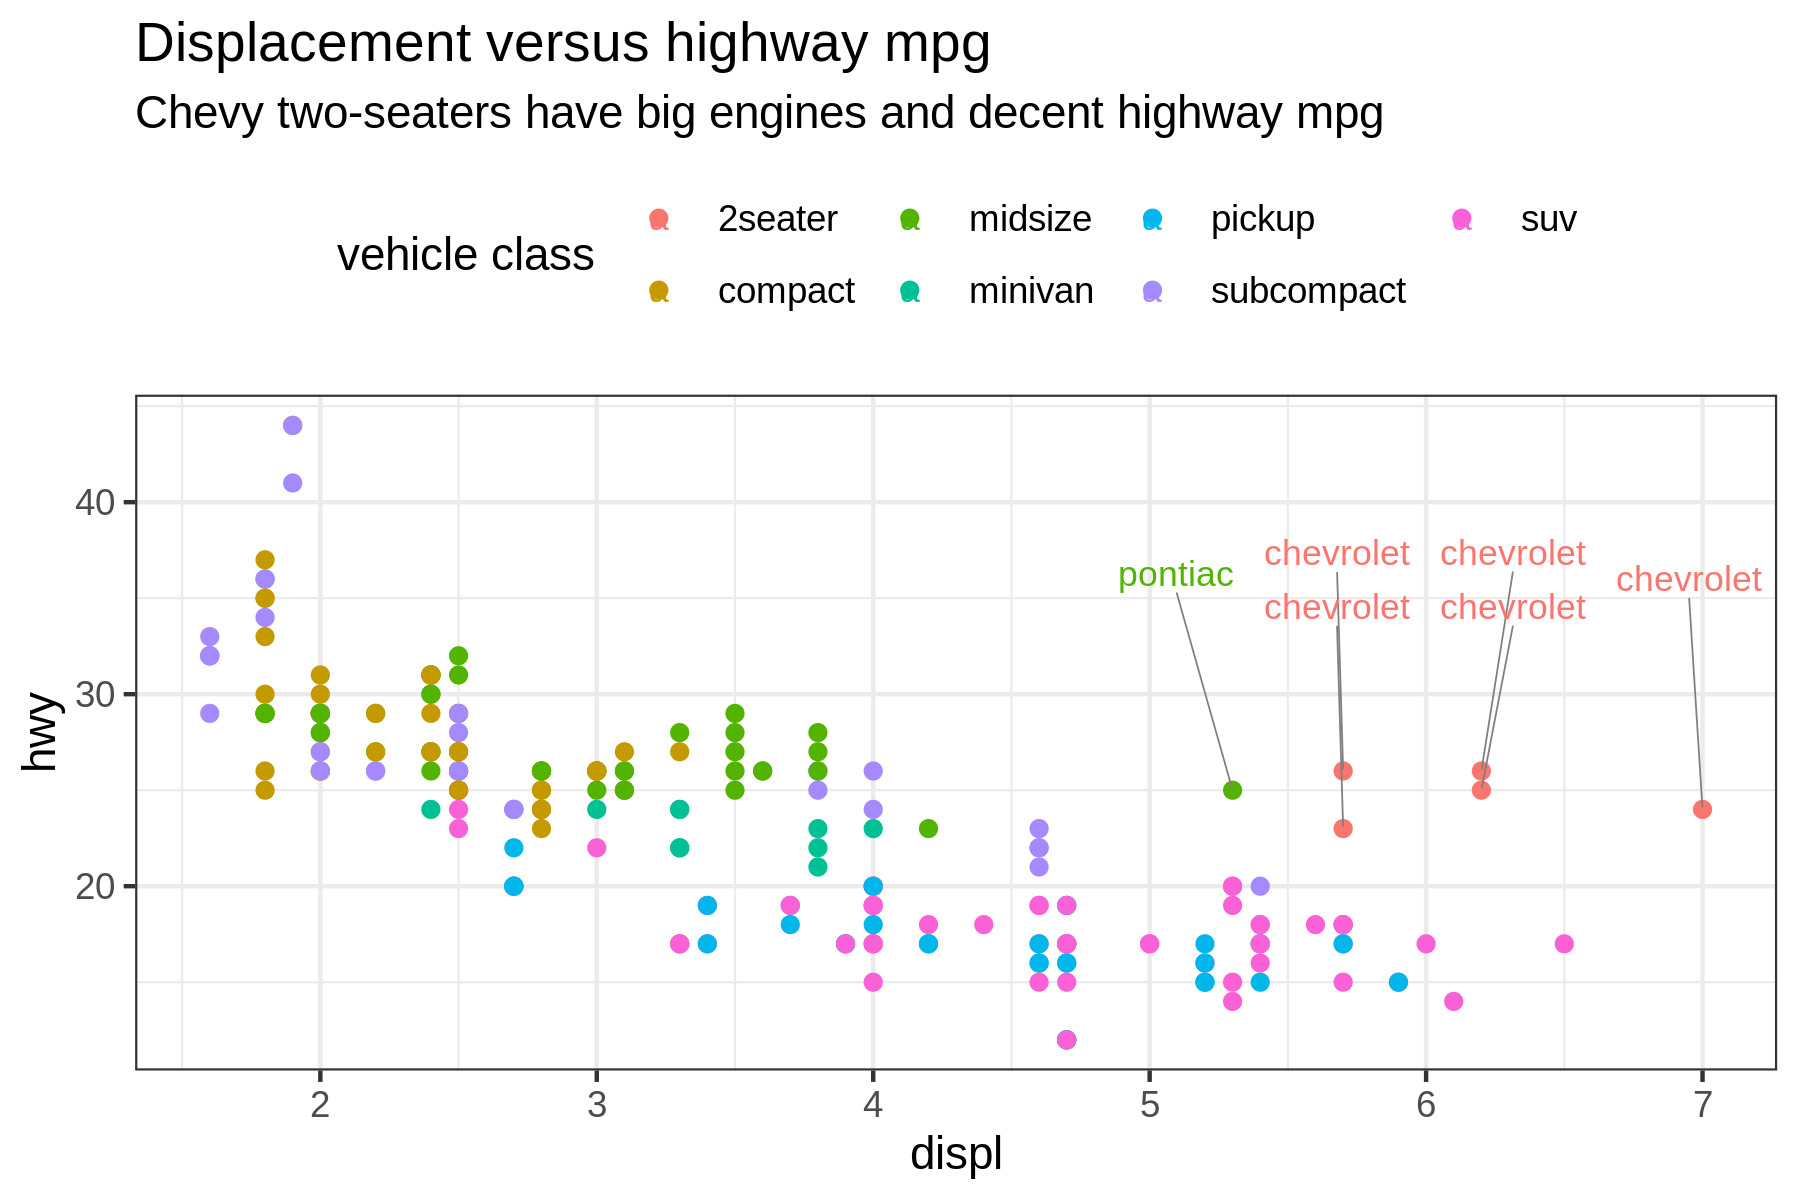

In [16]:
# Chart title/subtitle

p = p + labs(title = 'Displacement versus highway mpg', 
             subtitle = 'Chevy two-seaters have big engines and decent highway mpg')
 
p

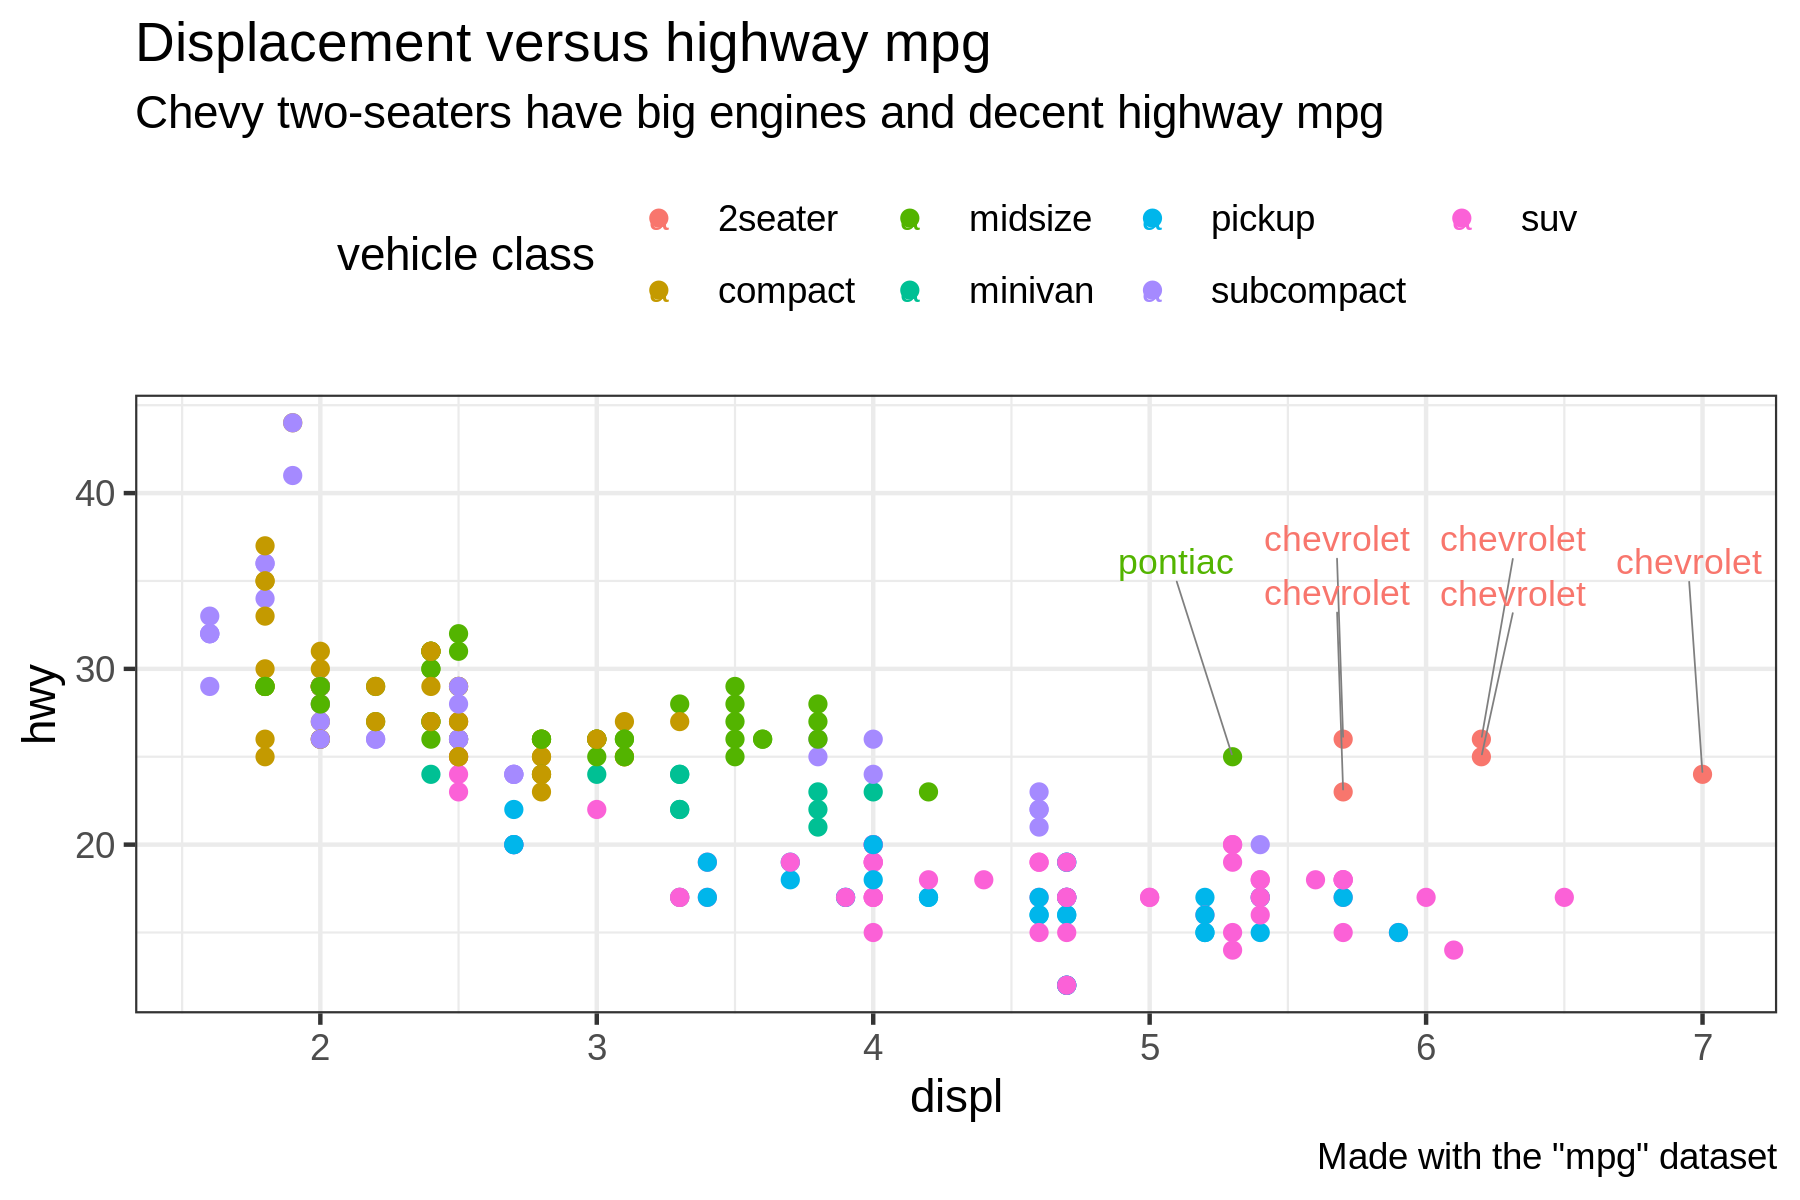

In [17]:
p = p + labs(caption = 'Made with the "mpg" dataset')

p

## Scales

We've seen lots of functions:

- `geom_`
- `element_`
- `theme_`
- `facet_`

We manipulate the look of scales with `scale_`

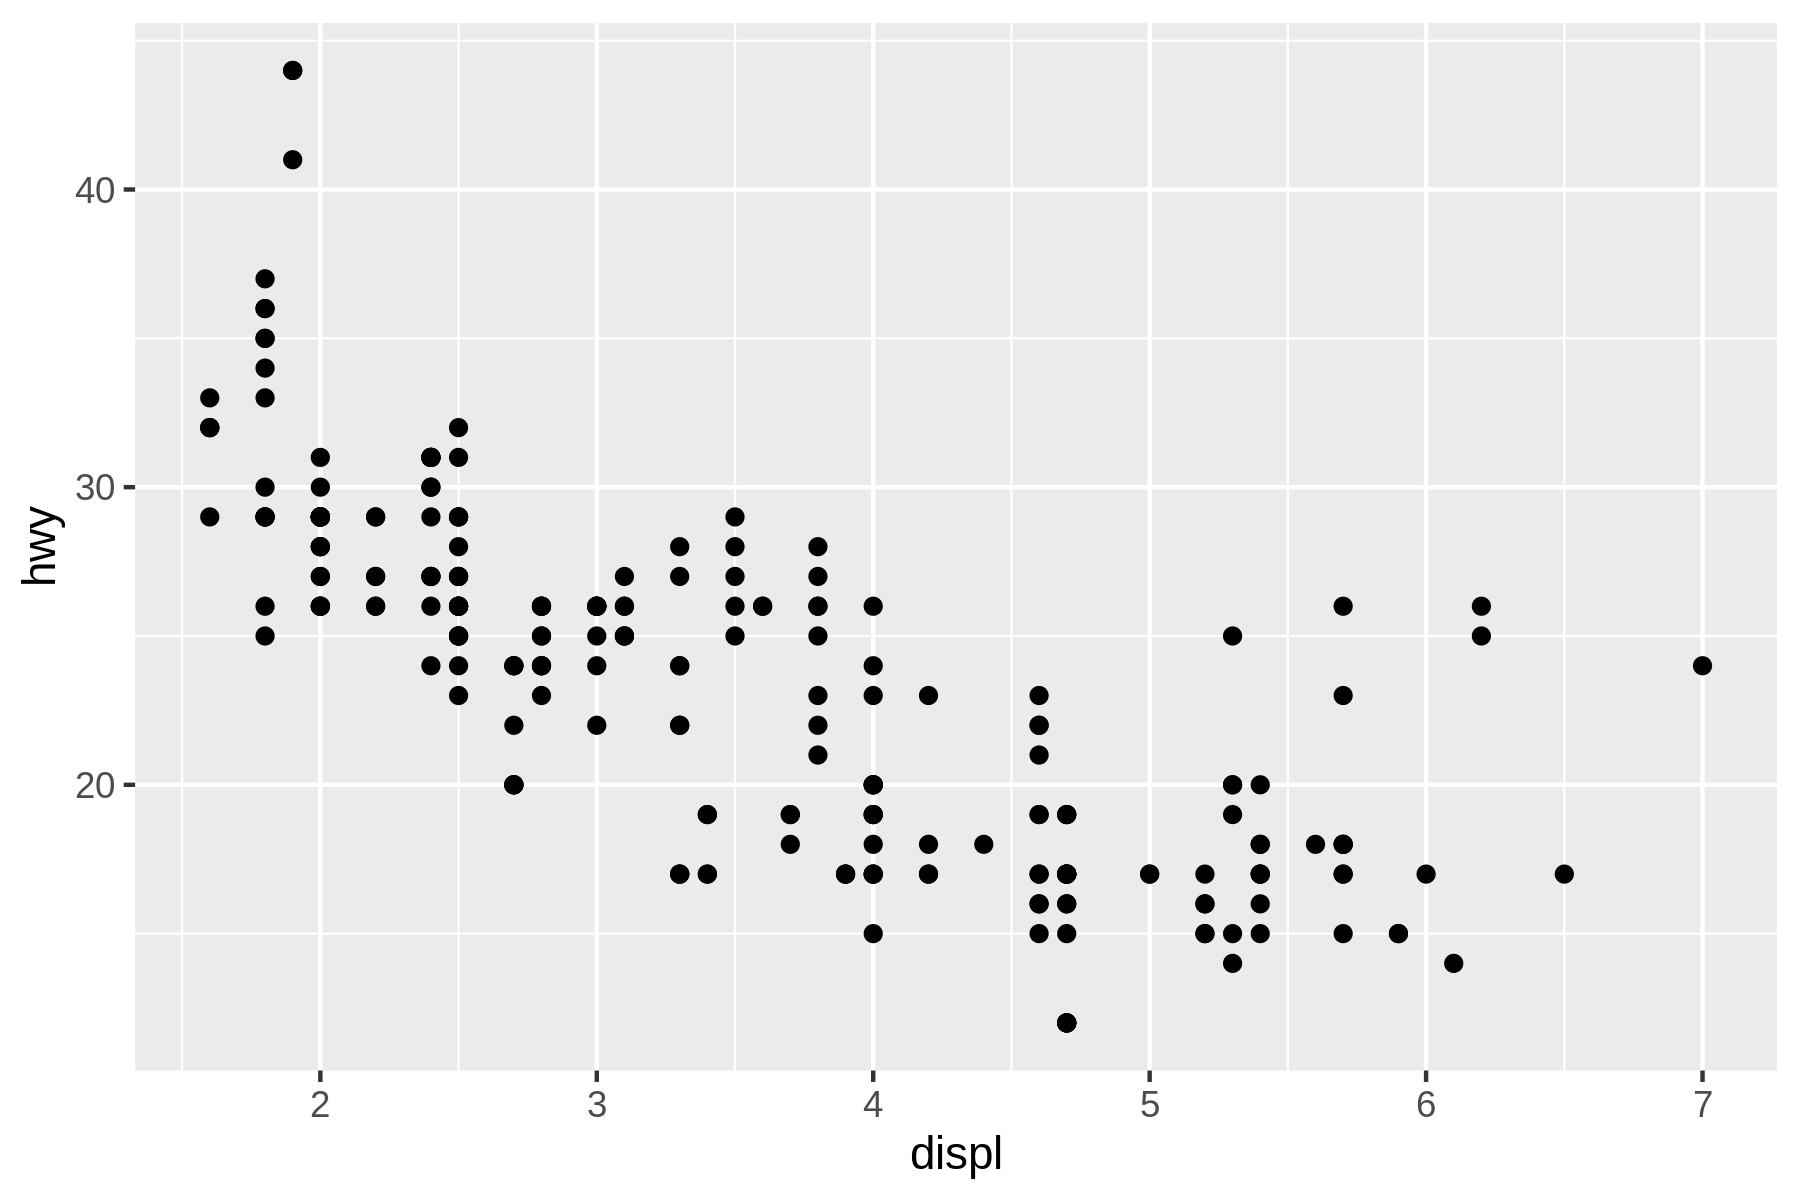

In [18]:
p = ggplot(mpg, aes(x = displ, y = hwy))

p = p + geom_point()

p

In [19]:
# p + geom_point(aes(color = hwy)) + scale_color_distiller(palette = 'YlGnBu')

# Why not _brewer?

In [20]:
# colors = c('red', 'blue', 'green', 'yellow', 'orange', 'violet', 'magenta')

# p + geom_point(aes(color = class)) + scale_color_manual(values = colors)

In [21]:
# library('scales')

# p + scale_y_continuous(labels = scientific)

Let's make this chart! 👇📊

[![](https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png?w=600)](https://fivethirtyeight.com/features/this-was-the-slowest-boston-marathon-since-the-1970s/)